<a href="https://colab.research.google.com/github/JasmankaurBal/SCT_ML_3/blob/main/STC_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train shape: (5000, 784) Test shape: (1000, 784)
SVM Accuracy on Fashion MNIST subset: 0.813
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       107
           1       0.92      0.96      0.94       105
           2       0.62      0.71      0.66       111
           3       0.80      0.78      0.79        93
           4       0.76      0.68      0.72       115
           5       0.94      0.92      0.93        87
           6       0.58      0.56      0.57        97
           7       0.91      0.92      0.91        95
           8       0.99      0.93      0.96        95
           9       0.92      0.94      0.93        95

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.81      0.81      1000



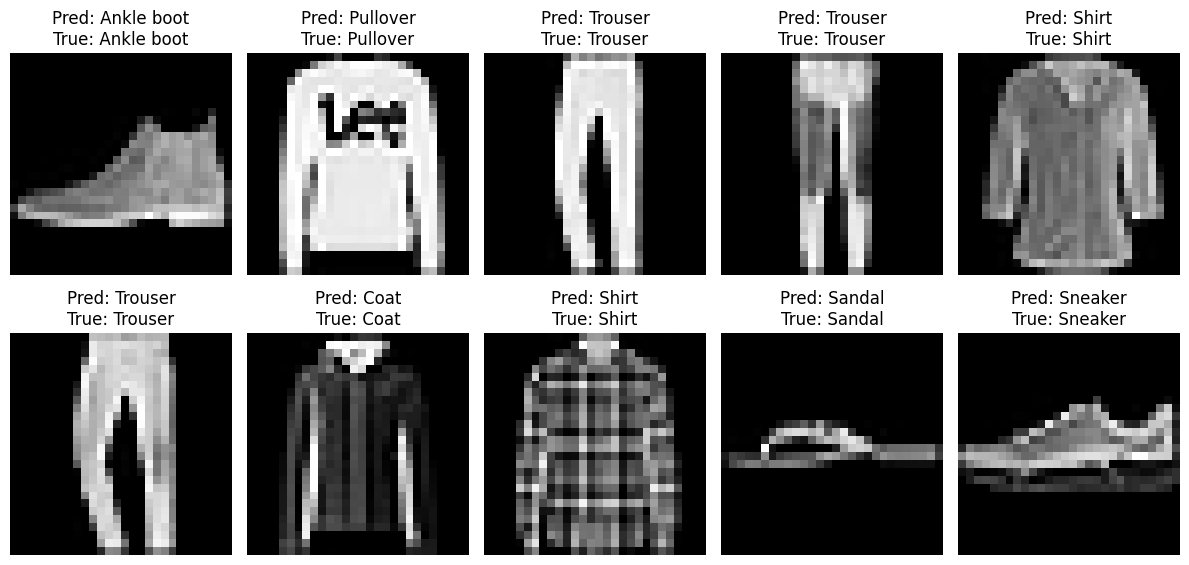

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Define functions based on the logic in the previous cell

def load_fashion_mnist():
    """Loads the Fashion MNIST dataset and preprocesses it."""
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Flatten images (28x28 -> 784 features)
    X_train = X_train.reshape(-1, 28*28)
    X_test = X_test.reshape(-1, 28*28)

    # use subset for faster training
    X_train_small, y_train_small = X_train[:5000], y_train[:5000]
    X_test_small, y_test_small = X_test[:1000], y_test[:1000]

    print("Train shape:", X_train_small.shape, "Test shape:", X_test_small.shape)
    return X_train_small, y_train_small, X_test_small, y_test_small

def scale_data(X_train, X_test):
    """Scales the data using StandardScaler."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_svm(X_train, y_train, kernel='linear', C=1.0):
    """Trains an SVM model."""
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X_train, y_train)
    return svm

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints metrics."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("SVM Accuracy on Fashion MNIST subset:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred

def visualize_predictions(X_test, y_test, y_pred, num_images=10):
    """Visualizes predictions alongside true labels."""
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

    plt.figure(figsize=(12,6))
    for i in range(num_images):
        plt.subplot(2,5,i+1)
        plt.imshow(X_test[i].reshape(28,28), cmap='gray')
        plt.title(f"Pred: {labels[y_pred[i]]}\nTrue: {labels[y_test[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the defined functions to execute the workflow
X_train, y_train, X_test, y_test = load_fashion_mnist()
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

# Train SVM
svm_model = train_svm(X_train_scaled, y_train, kernel='linear')

# Evaluate
y_pred = evaluate_model(svm_model, X_test_scaled, y_test)

# Visualize
visualize_predictions(X_test, y_test, y_pred)